## GOAL: Apply Tempel+[2014, 2017] catalogs to WISESize sample

In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

import os
homedir=os.getenv("HOME")

#### Load catalogs, plot results in RA-DEC space

In [129]:
#note -- each catalog has already been matched with WISESize (with 5" error)
path = homedir+'/Desktop/wisesize/'
wisesize = Table.read(path+'wisesize_v2.fits')
tempel2012 = Table.read(path+'tempel2012_wisesize_groups.fits')
tempel2014 = Table.read(path+'tempel2014_wisesize_filaments.fits')
tempel2017 = Table.read(path+'tempel2017_wisesize_groupclus.fits')

In [130]:
#RA, DEC, Z, GroupID, Ngal
group_ra = tempel2017['RA']
group_dec = tempel2017['DEC']
groupid = tempel2017['GroupID']
ngal = tempel2017['Ngal']

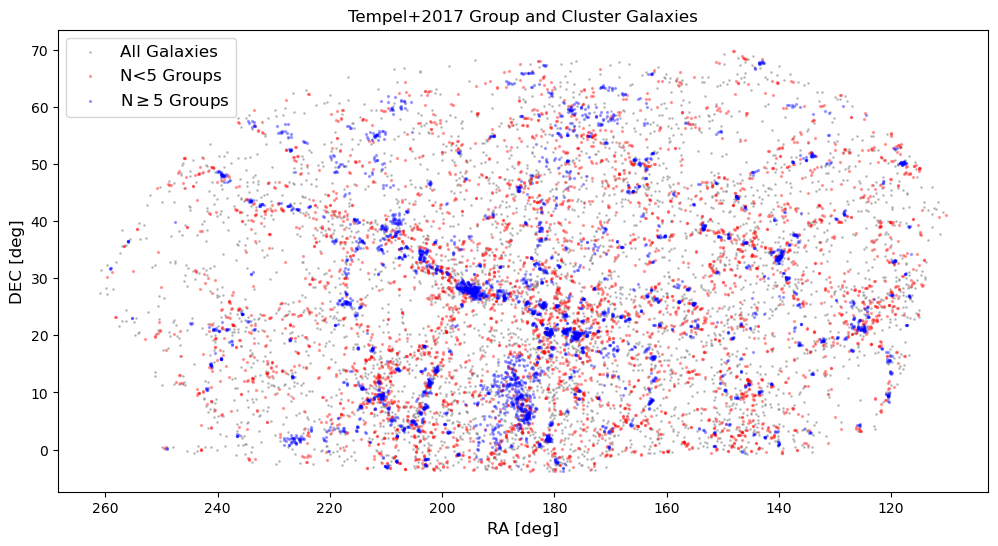

In [131]:
plt.figure(figsize=(12,6))

plt.scatter(group_ra[groupid==0],group_dec[groupid==0],s=1,color='gray',alpha=0.4,label='All Galaxies')
plt.scatter(group_ra[(groupid!=0)&(ngal<5)], group_dec[(groupid!=0)&(ngal<5)],
            s=2,alpha=0.3,color='red',label='N<5 Groups')    
plt.scatter(group_ra[(groupid!=0)&(ngal>=5)], group_dec[(groupid!=0)&(ngal>=5)],
            s=2,alpha=0.3,color='Blue',label=r'N$\geq$5 Groups')   

plt.gca().invert_xaxis()
plt.title('Tempel+2017 Group and Cluster Galaxies',fontsize=12)
plt.xlabel('RA [deg]',fontsize=12)
plt.ylabel('DEC [deg]',fontsize=12)
plt.legend(fontsize=12)

plt.show()

In [132]:
#RA_1, DEC_1, Z, fil_id, fil_dist [distance from the nearest filament axis
#                                 (or from filament end point) in units of h^−1 Mpc]

fil_ra = tempel2014['RA_1']
fil_dec = tempel2014['DEC_1']
filadist = tempel2014['fil_dist']

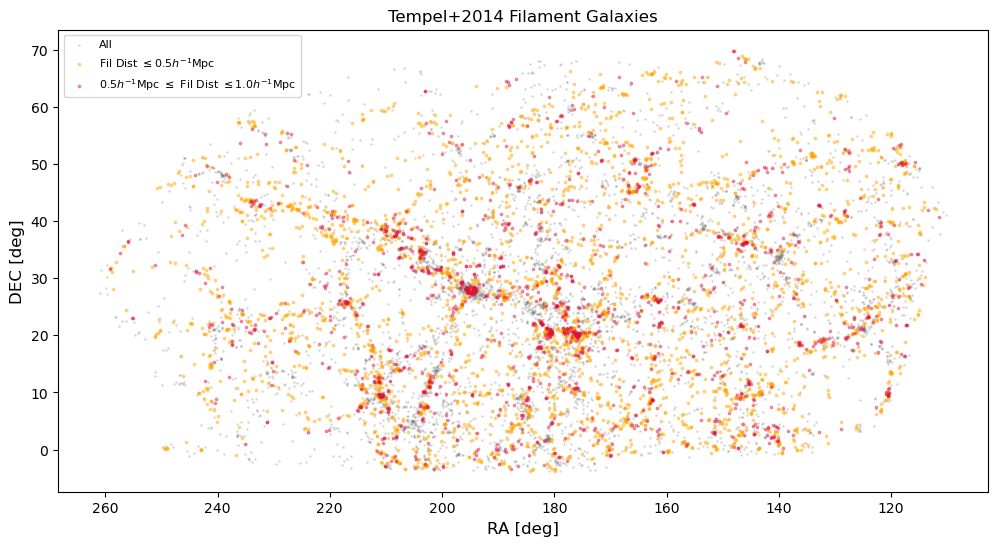

In [133]:
plt.figure(figsize=(12,6))

plt.scatter(fil_ra[(filadist>1.0)], fil_dec[(filadist>1.0)],
            s=1,alpha=0.2,color='gray',label=r'All') 

plt.scatter(fil_ra[filadist<=0.5],fil_dec[filadist<=0.5],s=3,color='orange',alpha=0.4,
            label=r'Fil Dist $\leq 0.5 h^{-1}$Mpc')

plt.scatter(fil_ra[(filadist>0.5)&(filadist<=1.0)], fil_dec[(filadist>0.5)&(filadist<=1.0)],
            s=3,alpha=0.4,color='crimson',label=r'$0.5 h^{-1}$Mpc $\leq$ Fil Dist $\leq 1.0 h^{-1}$Mpc')    

plt.gca().invert_xaxis()
plt.title('Tempel+2014 Filament Galaxies',fontsize=12)
plt.xlabel('RA [deg]',fontsize=12)
plt.ylabel('DEC [deg]',fontsize=12)
plt.legend(fontsize=8)

plt.show()

#### Find number of galaxies in both groups and filaments

In [134]:
#first, isolate all galaxies in groups
groupgal = tempel2017[(groupid!=0)]
print(f'Number of galaxies in groups: {len(groupgal)} of {len(tempel2017)}')
print(f'Number of groups: {len(np.unique(groupgal["GroupID"]))}')

Number of galaxies in groups: 7683 of 11785
Number of groups: 3023


In [135]:
#isolate all galaxies in filaments
#will create two subtables -- one for dist <= 0.5, one for dist <= 1.0
filamentgalA = tempel2014[tempel2014['fil_dist']<=0.5]
filamentgalB = tempel2014[tempel2014['fil_dist']<=1.0]
print(f'Number of galaxies <= 0.5 h^-1 Mpc from nearest filament spine: {len(filamentgalA)} of {len(tempel2014)}')
print(f'Number of galaxies <= 1.0 h^-1 Mpc from nearest filament spine: {len(filamentgalB)} of {len(tempel2014)}')

Number of galaxies <= 0.5 h^-1 Mpc from nearest filament spine: 3254 of 9495
Number of galaxies <= 1.0 h^-1 Mpc from nearest filament spine: 4646 of 9495


In [136]:
#combined Tempel+2014, Tempel+2017, and WISESize table
fil_group = Table.read(path+'tempel2014_2017_wisesize_combined.fits')

#9304 matches
pg_flag = (fil_group['GroupID']!=0) & (fil_group['Ngal']<5)
rg_flag = (fil_group['GroupID']!=0) & (fil_group['Ngal']>=5)
filA_flag = (fil_group['fil_dist']<=0.5)
filB_flag = (fil_group['fil_dist']<=1.0)

print(f'# Galaxies in poor group and <=0.5 h^-1 Mpc distance to filament: {len(fil_group[pg_flag&filA_flag])}')
print(f'# Galaxies in poor group and <=1.0 h^-1 Mpc distance to filament: {len(fil_group[pg_flag&filB_flag])}')
print()
print(f'# Galaxies in rich group and <=0.5 h^-1 Mpc distance to filament: {len(fil_group[rg_flag&filA_flag])}')
print(f'# Galaxies in rich group and <=1.0 h^-1 Mpc distance to filament: {len(fil_group[rg_flag&filB_flag])}')
print()
print(f'# Galaxies in poor group only: {len(fil_group[pg_flag&~filB_flag])}')
print(f'# Galaxies in rich group only: {len(fil_group[rg_flag&~filB_flag])}')
print()
print(f'# Galaxies in <=0.5 h^-1 Mpc distance to filament only: {len(fil_group[~pg_flag&~rg_flag&filA_flag])}')
print(f'# Galaxies in <=1.0 h^-1 Mpc distance to filament only: {len(fil_group[~pg_flag&~rg_flag&filB_flag])}')
print()
print('# Galaxies in none of the above environments: '+ \
      f'{len(fil_group[(fil_group["GroupID"]==0) & (fil_group["fil_dist"]>1.0)])}')

# Galaxies in poor group and <=0.5 h^-1 Mpc distance to filament: 1288
# Galaxies in poor group and <=1.0 h^-1 Mpc distance to filament: 1749

# Galaxies in rich group and <=0.5 h^-1 Mpc distance to filament: 804
# Galaxies in rich group and <=1.0 h^-1 Mpc distance to filament: 1299

# Galaxies in poor group only: 1438
# Galaxies in rich group only: 1329

# Galaxies in <=0.5 h^-1 Mpc distance to filament only: 1105
# Galaxies in <=1.0 h^-1 Mpc distance to filament only: 1514

# Galaxies in none of the above environments: 1975


#### Comparing results with $\Sigma_5$ 2D projected surface densities for WISESize sample

In [137]:
Sigma5 = tempel2017['2D_5NN']
Sigma3 = tempel2017['2D_3NN']
nneighbors = tempel2017['Ngal']

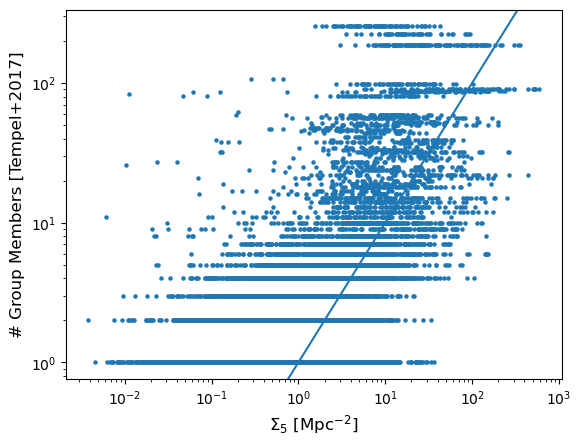

In [152]:
plt.scatter(Sigma5,nneighbors,s=5)
plt.axline((0,0),slope=1)
plt.xlabel(r'$\Sigma_5$ [Mpc$^{-2}$]',fontsize=12)
plt.ylabel('# Group Members [Tempel+2017]',fontsize=12)
plt.xscale('log')
plt.yscale('log')

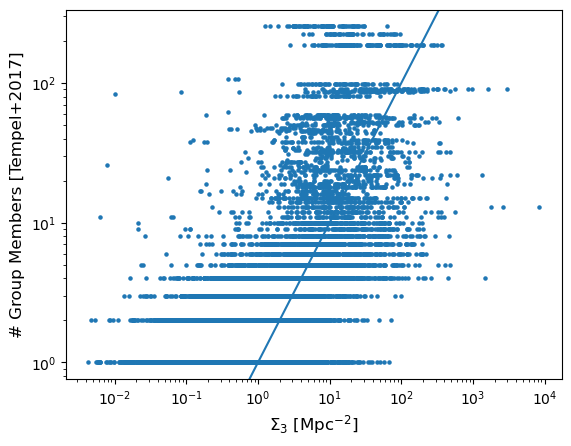

In [153]:
plt.scatter(Sigma3,nneighbors,s=5)
plt.axline((0,0),slope=1)
plt.xlabel(r'$\Sigma_3$ [Mpc$^{-2}$]',fontsize=12)
plt.ylabel('# Group Members [Tempel+2017]',fontsize=12)
plt.xscale('log')
plt.yscale('log')